# Karl's useful python recipes
---

## Format notebooks

### Hide code from output with a button

In [1]:
from IPython.display import HTML

hide_me = ''
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')


### Create clean notebook output

Hides execution counter and warning messages -- useful for giving a notebook a clean appearance. This should be run after everything is done since it does not allow for dynamically cleaning up the notebook

In [2]:
from IPython.display import HTML

hide_me = ''
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
    $('div.output_stderr').hide();
  });
</script>''')

### Disable scrolling when many figures/long output is generated.

I personally dislike having to scroll through output.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Add images

Note, the image path is either absolute or relative to the notebook's location. If it is relative, it is not necessary to include a leading `~`. If you're curious, the picture is of the wind tunnel we built at UBT.

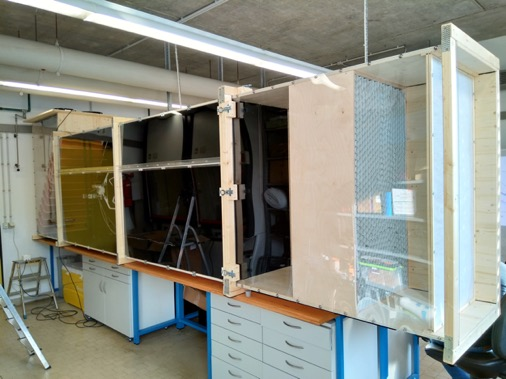

In [4]:
from IPython.core.display import Image 
Image(filename='Example_image.jpg')

---

## Format markdown

### Highlighting/HTML syntax

<mark>- This is an item in a list. It is highlighted. </mark>  
<mark>- This item is highlighted too. </mark>  


And here is a link to a tool for spell checking in jupyter notebooks, useful for markdown sections
https://github.com/Calysto/notebook-extensions
I don’t know what the other extensions do, but the `calysto/spell-check/main` extension creates a little button at the top of the notebook that enables/disables spell check.

---
## Format figures


### Initial formatting
I like to use the seaborn library for creating clean figures. Here is how I format all figures. This is usually at the top of a notebook. 

In [5]:
import seaborn as sns

sns.set_style("whitegrid")
context = 'talk'
sns.set_context(context)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The `context` variable is then used to specify the figure name so that each context is a separate figure.

```python
fig.savefig('FigureName.' + context + '.pdf')
```

I really like this custom color scheme, so I also set that as my defualt. It is relatively colorblind friendly without being awful. I also create a linestyle list for easy looping.

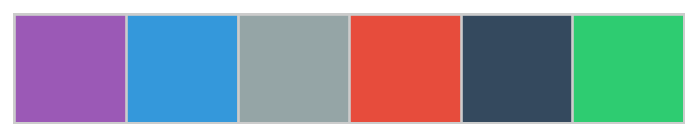

In [6]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))
ls = ['-', '--', ':', '-']

sns.palplot(sns.color_palette(flatui))


### Custom legend handler

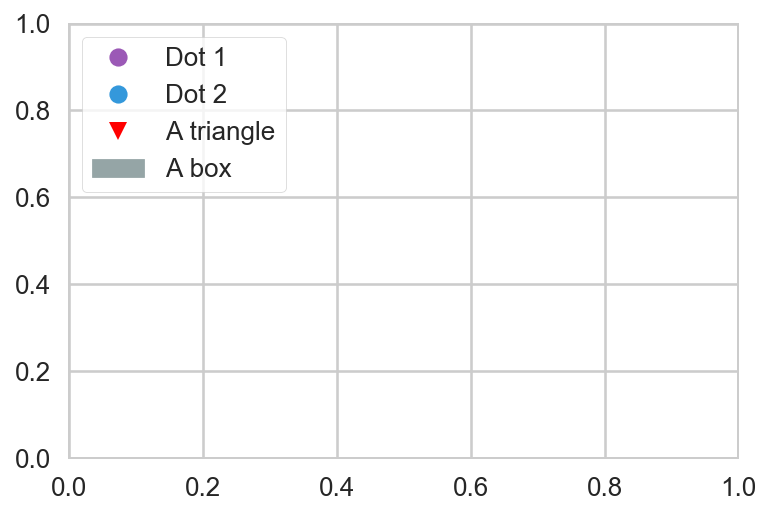

In [7]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib

label = ['Dot 1', 'Dot 2']
marker_legend = [mlines.Line2D([],[], marker='o', color=flatui[n], label=lab,
                               linestyle='none') for n, lab in enumerate(label)]
marker_legend.append(mlines.Line2D([],[], marker='v', color='r',
                                   label='A triangle', linestyle='none'))
marker_legend.append(matplotlib.patches.Patch(color=flatui[2], label='A box'))
leg = plt.legend(handles=marker_legend,loc='upper left', ncol=1, frameon=True)


---
## Useful functions

### Convert matlab datenums to numpy datetime64 object.

In [8]:
# Convert MATLAB datenum to numpy datetime 64
def matlabdn2datetime(matlabDatenum):
    npDatetime = [np.datetime64(datetime.fromordinal(int(dt))\
                                + timedelta(days=float(np.remainder(dt,1)))\
                                - timedelta(days = 366))\
                    for dt in matlabDatenum]        
    return(npDatetime)